In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
url = "https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv"
df = pd.read_csv(url)
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [10]:
X = df.age
y = df.bought_insurance

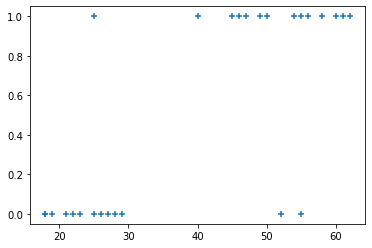

In [11]:
plt.scatter(X, y, marker='+')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], y, test_size=0.2)

In [16]:
X_test

,age
17,58
0,22
12,27
10,18
21,26
6,55


In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [18]:
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1], dtype=int64)

In [21]:
model.score(X_test, y_test)

0.8333333333333334

#### Logistic Regresssion Multiclass

In [25]:
from sklearn.datasets import load_digits

In [26]:
digits = load_digits()

In [27]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [28]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

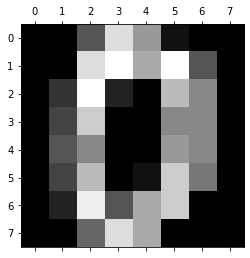

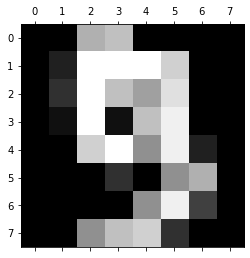

In [31]:
plt.gray()
plt.matshow(digits.images[0])
plt.matshow(digits.images[9])

plt.show()

In [33]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [35]:
len(X_train)

1437

In [36]:
len(X_test)

360

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [40]:
model.fit(X_train, y_train)

C:\Users\Sancheet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
model.score(X_test, y_test)

0.9722222222222222

#### Confusion Matrix

In [ ]:
# Confusion matrix tells us where our model did wrong. Principal diagonal elements represent correct classification

In [43]:
y_predicted = model.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 1,  1,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 37]], dtype=int64)

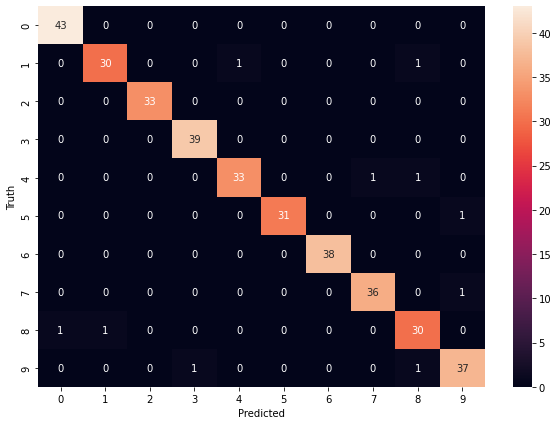

In [49]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()